In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
agg = pd.read_csv('./Input/AGG.csv')
jnk = pd.read_csv('./Input/jnk.csv') 
spy = pd.read_csv('./Input/SPY.csv') 

# Convert 'Date' columns to datetime
agg['Date'] = pd.to_datetime(agg['Date'])
jnk['Date'] = pd.to_datetime(jnk['Date'])
spy['Date'] = pd.to_datetime(spy['Date'])

# filter the Date from 2014-06-16 to 2024-06-14
agg = agg[(agg['Date'] >= '2014-06-16') & (agg['Date'] <= '2024-06-14')]
jnk = jnk[(jnk['Date'] >= '2014-06-16') & (jnk['Date'] <= '2024-06-14')]
spy = spy[(spy['Date'] >= '2014-06-16') & (spy['Date'] <= '2024-06-14')]


In [5]:
# Calculate daily returns
agg['DailyReturn'] = agg['Adj Close'].pct_change()
jnk['DailyReturn'] = jnk['Adj Close'].pct_change()
spy['DailyReturn'] = spy['Adj Close'].pct_change()

# Calculate cumulative returns
agg['cumret'] = (1 + agg['DailyReturn']).cumprod() - 1
jnk['cumret'] = (1 + jnk['DailyReturn']).cumprod() - 1
spy['cumret'] = (1 + spy['DailyReturn']).cumprod() - 1

# Calculate log returns
agg['LogReturn'] = np.log(agg['Adj Close'] / agg['Adj Close'].shift(1))
jnk['LogReturn'] = np.log(jnk['Adj Close'] / jnk['Adj Close'].shift(1))
spy['LogReturn'] = np.log(spy['Adj Close'] / spy['Adj Close'].shift(1))

In [6]:
agg.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,DailyReturn,cumret,LogReturn
0,2014-06-16,108.870003,108.959999,108.800003,108.820000,84.850655,1308900,NaN,NaN,NaN
1,2014-06-17,108.760002,108.790001,108.610001,108.620003,84.694695,842300,-0.001838,-0.001838,-0.001840
2,2014-06-18,108.730003,108.910004,108.639999,108.910004,84.920784,504400,0.002669,0.000826,0.002666
3,2014-06-19,109.000000,109.029999,108.680000,108.750000,84.796043,690000,-0.001469,-0.000644,-0.001470
4,2014-06-20,108.730003,108.940002,108.730003,108.940002,84.944199,690600,0.001747,0.001102,0.001746
5,2014-06-23,108.989998,109.019997,108.839996,108.839996,84.866219,559700,-0.000918,0.000183,-0.000918
6,2014-06-24,108.959999,109.050003,108.879997,109.029999,85.014366,740800,0.001746,0.001929,0.001744
7,2014-06-25,109.199997,109.279999,109.110001,109.180000,85.131363,713700,0.001376,0.003308,0.001375
8,2014-06-26,109.250000,109.410004,109.250000,109.389999,85.295052,673700,0.001923,0.005237,0.001921
9,2014-06-27,109.449997,109.500000,109.349998,109.389999,85.295052,668200,0.000000,0.005237,0.000000


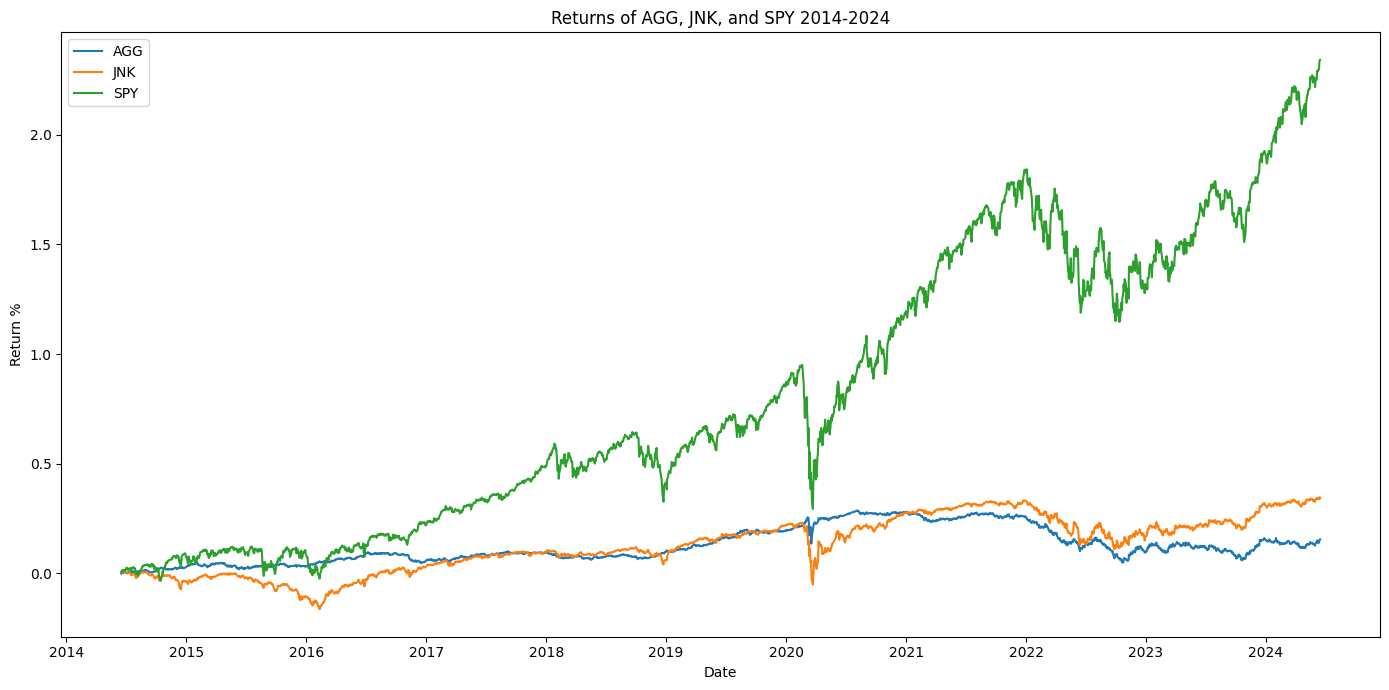

In [8]:
# Plotting
plt.figure(figsize=(14, 7))

plt.plot(agg['Date'], agg['cumret'], label='AGG')
plt.plot(jnk['Date'], jnk['cumret'], label='JNK')
plt.plot(spy['Date'], spy['cumret'], label='SPY')

plt.title('Returns of AGG, JNK, and SPY 2014-2024')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.legend()

plt.tight_layout()
plt.show()

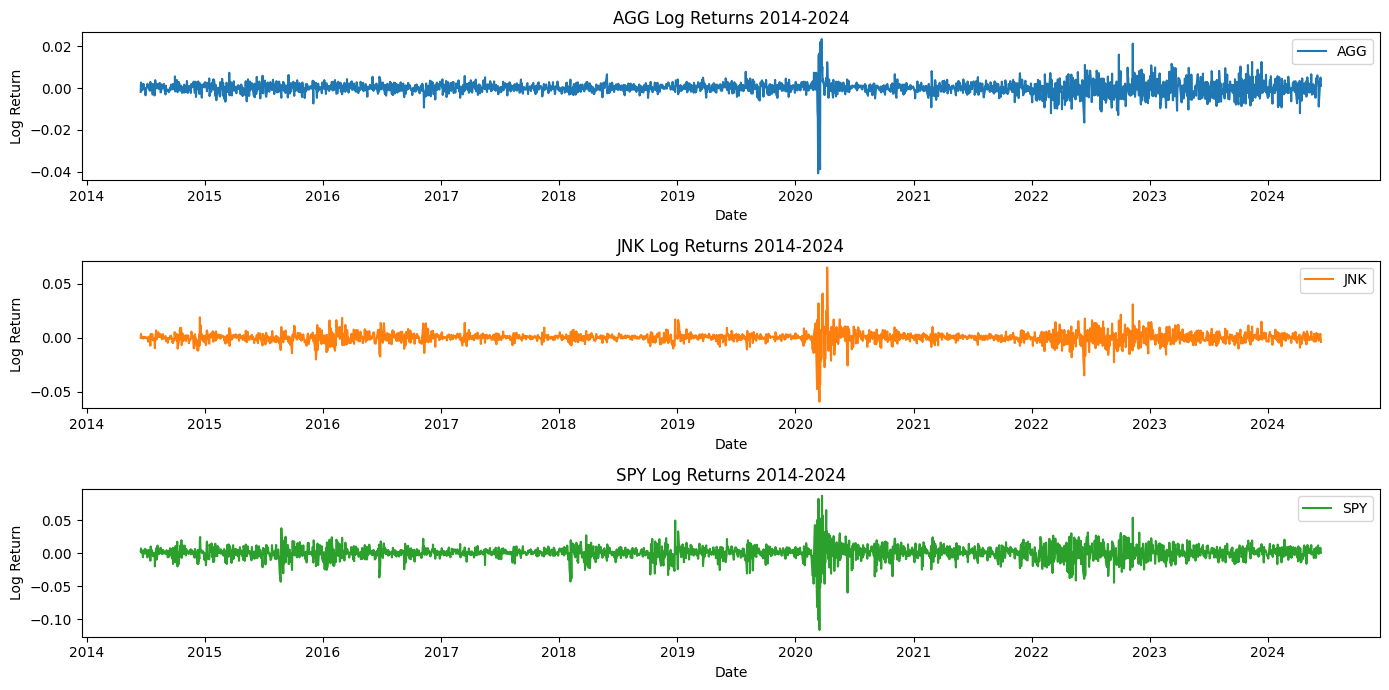

In [12]:
# Retrieve the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plotting
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(agg['Date'], agg['LogReturn'], label='AGG', color=default_colors[0])
plt.title('AGG Log Returns 2014-2024')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(jnk['Date'], jnk['LogReturn'], label='JNK', color=default_colors[1])
plt.title('JNK Log Returns 2014-2024')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(spy['Date'], spy['LogReturn'], label='SPY', color=default_colors[2])
plt.title('SPY Log Returns 2014-2024')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

plt.tight_layout()
plt.show()